In [3]:
%matplotlib inline
from pathlib import Path

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [27]:
log_path = Path("../ckpt/qa/roberta_new/runs/Apr23_16-38-10_clais-GPU")
save_dir = Path("../images")
save_dir.mkdir(parents=True, exist_ok=True)

accumulator = EventAccumulator(str(log_path.resolve()))
accumulator.Reload()

In [26]:
# accumulator.Tags()

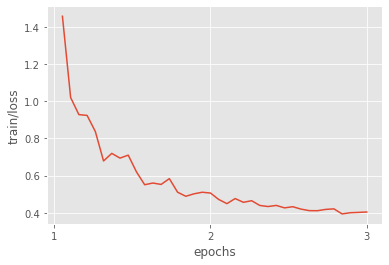

In [28]:
max_epoch = 3
events = accumulator.Scalars("train/loss")
steps = [event.step for event in events]
max_step = max(steps)
graph_data = (
    [step / max_step * (max_epoch - 1) + 1 for step in steps],
    [event.value for event in events]
)
plt.plot(graph_data[0], graph_data[1])
plt.xlabel("epochs")
plt.ylabel("train/loss")
plt.xticks([1,2,3])
plt.savefig(save_dir / f"train_loss.png", dpi=300, bbox_inches='tight')
plt.show()

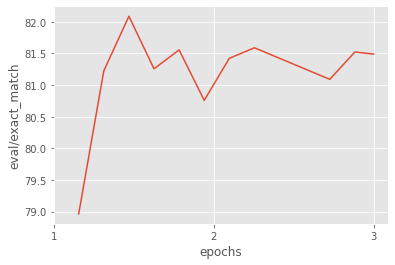

In [29]:
max_epoch = 3
events = accumulator.Scalars("eval/exact_match")
steps = [event.step for event in events]
max_step = max(steps)
graph_data = (
    [step / max_step * (max_epoch - 1) + 1 for step in steps],
    [event.value for event in events]
)
plt.plot(graph_data[0], graph_data[1])
plt.xlabel("epochs")
plt.ylabel("eval/exact_match")
plt.xticks([1,2,3])
plt.savefig(save_dir / f"eval_exact_match.png", dpi=300, bbox_inches='tight')
plt.show()